In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [3]:
data = fetch_california_housing()
df= pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
print(df.head(150))
df.info()

print(df.isnull().sum())
#X = data.data  # Features
#y = data.target 

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1    8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2    7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3    5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4    3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
..      ...       ...       ...        ...         ...       ...       ...   
145  5.2402      52.0  6.200893   0.946429       510.0  2.276786     37.81   
146  6.5217      52.0  6.399351   1.087662       765.0  2.483766     37.81   
147  3.2632      52.0  4.745652   1.010870      1129.0  2.454348     37.80   
148  3.0298      52.0  5.183673   1.052154      1073.0  2.433107     37.80   
149  4.5428      52.0  5.283495   1.050485      1185.0  2.300971     37.80   

     Longitude  target  
0      -122.23   4.526  
1      -122.2

In [4]:
X=df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [6]:
#cheching whether scaled or not
import numpy as np
print(np.mean(X_train_scaled, axis=0))
print(np.std(X_train_scaled, axis=0))

[-6.51933288e-17 -9.25185854e-18 -1.98108110e-16 -1.70729064e-16
 -2.15159501e-19  4.93656580e-17  6.40099515e-17  1.75333477e-15]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:
print("Mean before scaling:")
print(np.mean(X_train, axis=0))
print("\nStandard deviation before scaling:")
print(np.std(X_train, axis=0))

Mean before scaling:
MedInc           3.880754
HouseAge        28.608285
AveRooms         5.435235
AveBedrms        1.096685
Population    1426.453004
AveOccup         3.096961
Latitude        35.643149
Longitude     -119.582290
dtype: float64

Standard deviation before scaling:
MedInc           1.904236
HouseAge        12.602118
AveRooms         2.387303
AveBedrms        0.433201
Population    1137.021948
AveOccup        11.578394
Latitude         2.136601
Longitude        2.005593
dtype: float64


In [7]:
#LINEAR REGRESSER
from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(X_train_scaled,y_train)
y_pred_linear= linear_regressor.predict(X_test_scaled)
y_pred_linear1=linear_regressor.predict(X_train_scaled)

In [9]:
##ERROR
#Training Error=y_train_pred−y train_actual



from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

print('Errors for Training set')
mse=mean_squared_error(y_train,y_pred_linear1)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

mae = mean_absolute_error(y_train, y_pred_linear1)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_train, y_pred_linear1)
print(f"R-squared (R²): {r2}")

Errors for Training set
Mean Squared Error (MSE): 0.5179331255246699
Root Mean Squared Error (RMSE): 0.7196757085831575
Mean Absolute Error (MAE): 0.5286283596581934
R-squared (R²): 0.6125511913966952


In [10]:


print('Errors for  Linear Regressor Testing set')
mse=mean_squared_error(y_test,y_pred_linear)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

mae = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test, y_pred_linear)
print(f"R-squared (R²): {r2}")


Errors for  Linear Regressor Testing set
Mean Squared Error (MSE): 0.5388649914036732
Root Mean Squared Error (RMSE): 0.7340742410708014
Mean Absolute Error (MAE): 0.5353166913867703
R-squared (R²): 0.5887810596909611


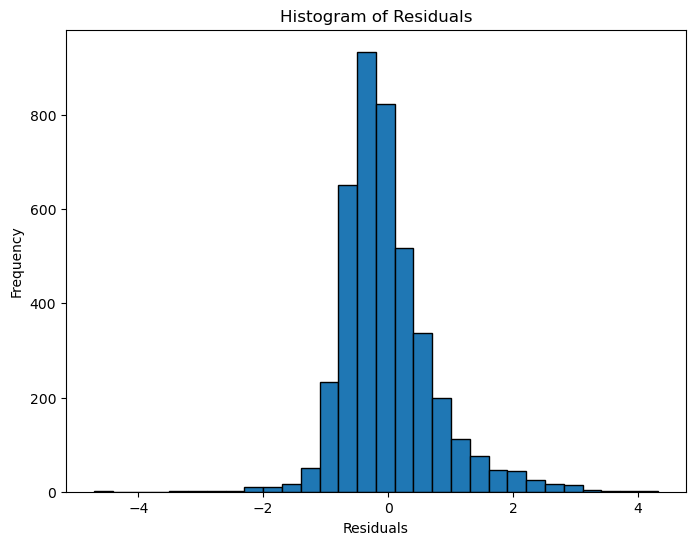

In [11]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred_linear
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


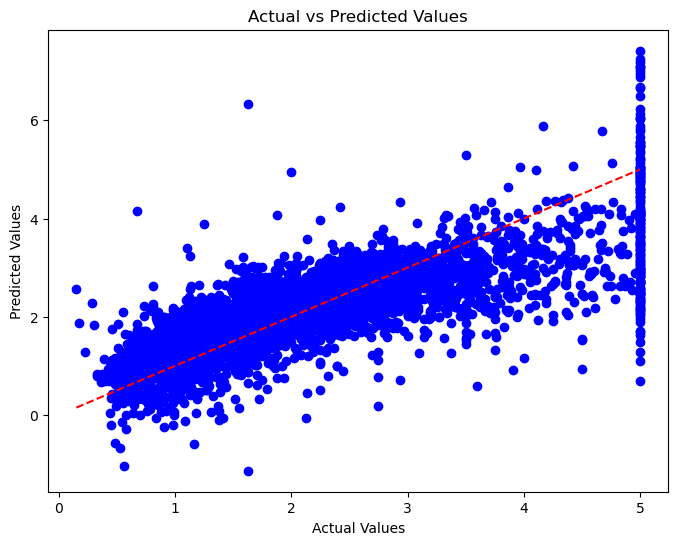

In [28]:
#Actual Versus Predicted plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [12]:
#The graph seems pathetic. Lets go for scaling y also

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
print("Scaled y_train:")
print(y_train_scaled)

print("\nScaled y_test:")
print(y_test_scaled) #there is a dimension problem


Scaled y_train:
[[-0.90118909]
 [ 1.5127714 ]
 [-0.29921255]
 ...
 [ 0.12891731]
 [ 0.65997132]
 [ 1.01890847]]

Scaled y_test:
[[-1.37948366]
 [-1.39591692]
 [ 2.53250754]
 ...
 [ 2.53250754]
 [-1.16671609]
 [-0.48170831]]


In [13]:
linear_regressor.fit(X_train_scaled, y_train_scaled)
y_train_pred_scaled = linear_regressor.predict(X_train_scaled)
y_test_pred_scaled = linear_regressor.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)


mse_train = mean_squared_error(y_train_scaled, y_train_pred_scaled)
mse_test = mean_squared_error(y_test_scaled, y_test_pred_scaled)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train_scaled, y_train_pred_scaled)
mae_test = mean_absolute_error(y_test_scaled, y_test_pred_scaled)
r2_train = r2_score(y_train_scaled, y_train_pred_scaled)
r2_test = r2_score(y_test_scaled, y_test_pred_scaled)


# Print the results
print("\nTraining Set_scaled Evaluation:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")
print(f"R²: {r2_train}")

print("\nTest Set_scaled  Linear Regreeser Scaled Evaluation:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R²: {r2_test}")





Training Set_scaled Evaluation:
MSE: 0.3874488086033047
RMSE: 0.6224538606220582
MAE: 0.4572153254294919
R²: 0.6125511913966952

Test Set_scaled  Linear Regreeser Scaled Evaluation:
MSE: 0.40310725193698516
RMSE: 0.6349072782202021
MAE: 0.46300012246504796
R²: 0.5887810596909611


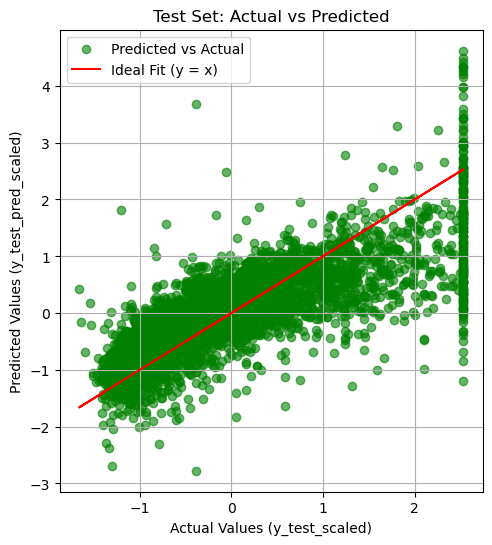

In [14]:
# Scatter plot for Test Set

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test_scaled, y_test_pred_scaled, color="green", alpha=0.6, label="Predicted vs Actual")
plt.plot(y_test_scaled, y_test_scaled, color="red", label="Ideal Fit (y = x)")
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Actual Values (y_test_scaled)")
plt.ylabel("Predicted Values (y_test_pred_scaled)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred_linear.shape}")


y_test shape: (4128,)
y_pred shape: (4128,)


Training Set Evaluation:
MSE: 1.0357621381535573e-31
RMSE: 3.218325866275131e-16
MAE: 4.5936553441370335e-17
R²: 1.0

Test Set Evaluation:
MSE: 0.495235205629094
RMSE: 0.7037294974840077
MAE: 0.45467918846899225
R²: 0.622075845135081


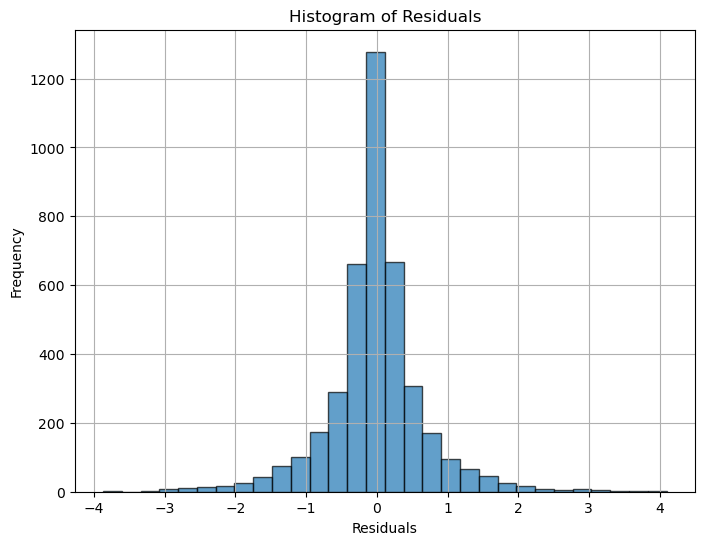

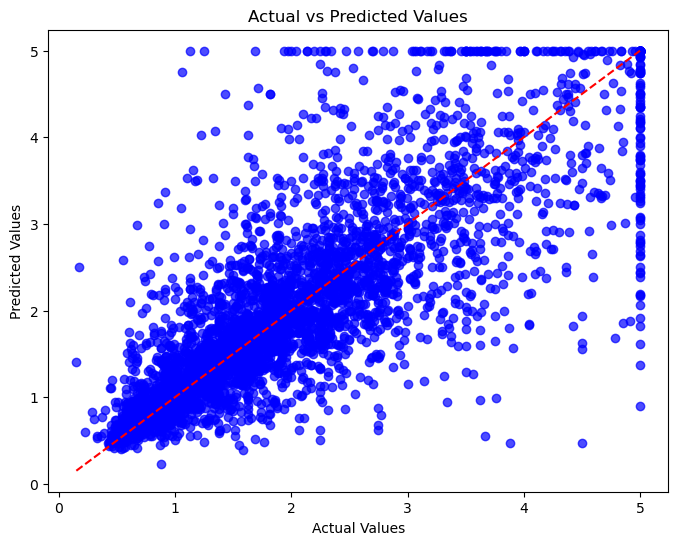

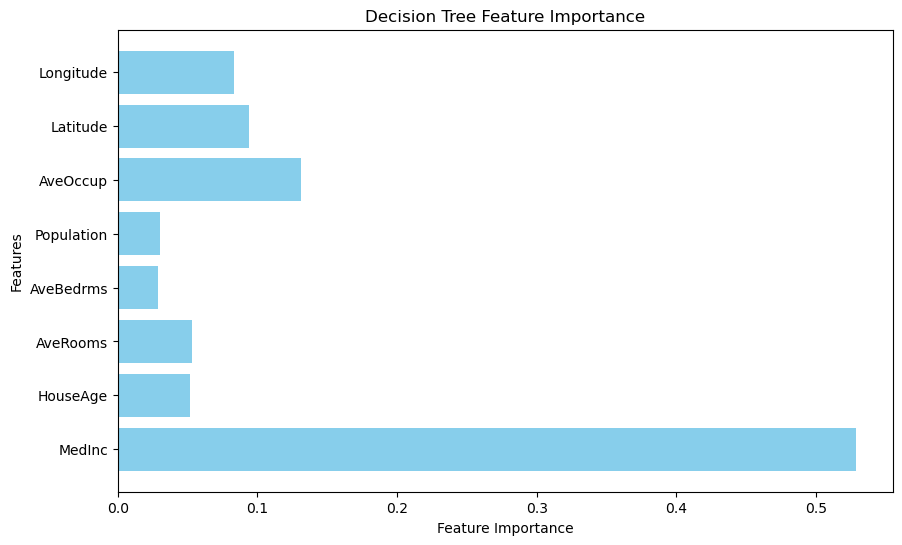

In [16]:

from sklearn.tree import DecisionTreeRegressor


# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Evaluation
print("Training Set Evaluation:")
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")
print(f"R²: {r2_train}")

print("\nTest Set Evaluation:")
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R²: {r2_test}")

# Residuals plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Feature importance
feature_importances = dt_regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()


# Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

# Train the model
dtr.fit(X_train_scaled, y_train)

# Predictions
y_pred_dtr = dtr.predict(X_test_scaled)




Random Forest Regressor Performance:
R² (Accuracy): 0.52
MSE: 0.63
RMSE: 0.79
MAE: 0.56


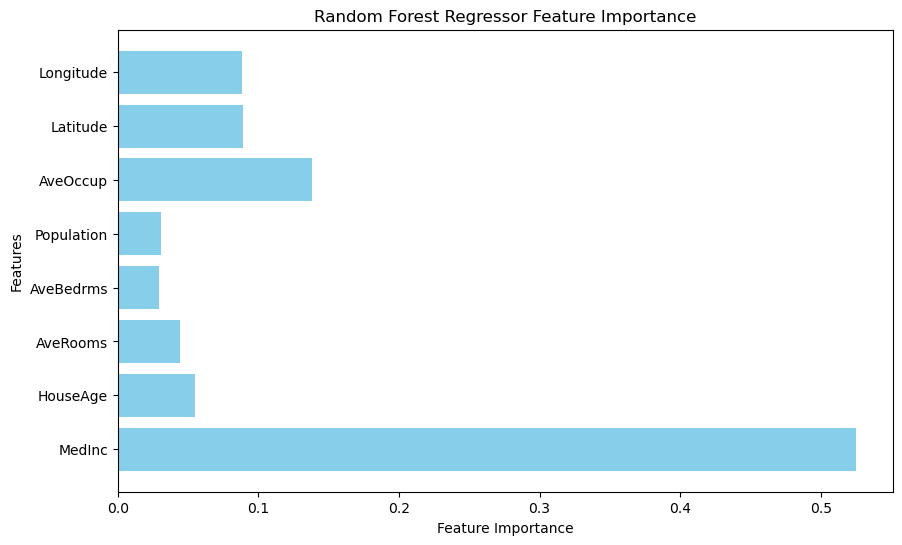

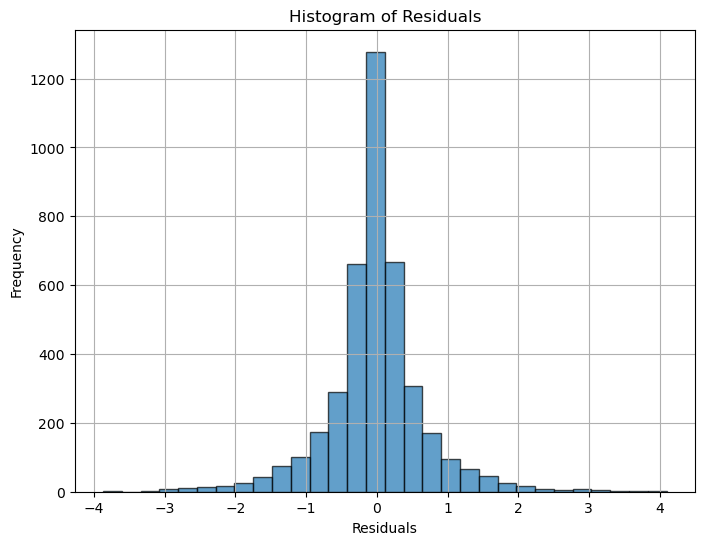

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Regressor Performance:")
print(f"R² (Accuracy): {r2_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")

# Feature importance visualization
importances = rf_regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor Feature Importance')
plt.show()




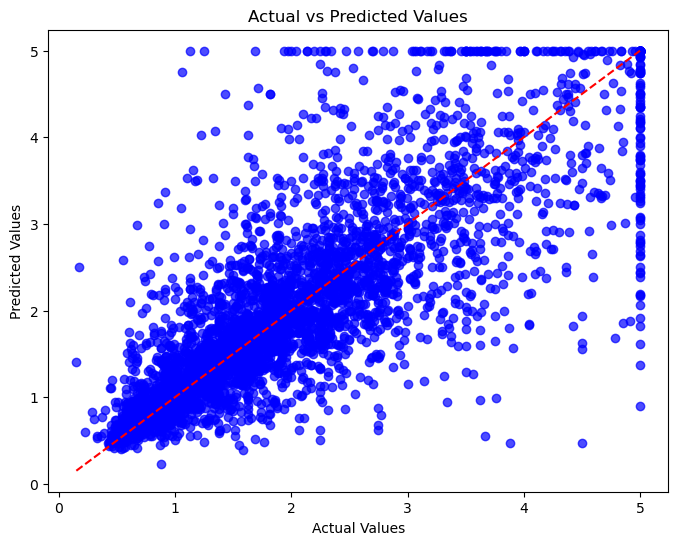

In [19]:


# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [52]:
#The Decision Tree Regressor performs regression tasks, so metrics like accuracy, precision, and recall are not applicable because they are used for classification problems.



# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train_scaled, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluation Metrics
print("\nGradient Boosting Regressor Evaluation:")
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"MSE: {mse_gbr}")
print(f"RMSE: {rmse_gbr}")
print(f"MAE: {mae_gbr}")
print(f"R²: {r2_gbr}")




Gradient Boosting Regressor Evaluation:
MSE: 0.4367062763979182
RMSE: 0.660837556739868
MAE: 0.4892696347573969
R²: 0.6667404728986555


In [17]:
# Support Vector Regressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Support Vector Regressor
svr = SVR(kernel='rbf')  

# Train the model
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation Metrics
print("\nSupport Vector Regressor Evaluation:")
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"MSE: {mse_svr}")
print(f"RMSE: {rmse_svr}")
print(f"MAE: {mae_svr}")
print(f"R²: {r2_svr}")




Support Vector Regressor Evaluation:
MSE: 0.9245915228662775
RMSE: 0.9615568224843904
MAE: 0.740147040535218
R²: 0.29442522279765326


In [ ]:
  #HYPERPARAMETER TUNING

In [20]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Before tuning
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression (before tuning):")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# After tuning (Ridge)
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train, y_train)
y_pred_ridge = grid_ridge.predict(X_test)

print("\nRidge Regression (after tuning):")
print("Best alpha:", grid_ridge.best_params_['alpha'])
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


Linear Regression (before tuning):
MSE: 0.555891598695244
MAE: 0.5332001304956566
R²: 0.5757877060324511

Ridge Regression (after tuning):
Best alpha: 10
MSE: 0.5550405537343008
MAE: 0.533243256579865
R²: 0.5764371559180017


In [22]:
from sklearn.tree import DecisionTreeRegressor

# Before tuning
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree (before tuning):")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))

# After tuning
params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=0), params, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_dt_tuned = grid_dt.predict(X_test)

print("\nDecision Tree (after tuning):")
print("Best params:", grid_dt.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_dt_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_dt_tuned))
print("R²:", r2_score(y_test, y_pred_dt_tuned))


Decision Tree (before tuning):
MSE: 0.5008492183132024
MAE: 0.4568540915697674
R²: 0.617791676774418

Decision Tree (after tuning):
Best params: {'max_depth': 10, 'min_samples_split': 10}
MSE: 0.4106631936305679
MAE: 0.4321003256618351
R²: 0.6866144841423137


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Before tuning
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest (before tuning):")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

# After tuning
params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=0), params, cv=3)
grid_rf.fit(X_train, y_train)
y_pred_rf_tuned = grid_rf.predict(X_test)

print("\nRandom Forest (after tuning):")
print("Best params:", grid_rf.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_rf_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_tuned))
print("R²:", r2_score(y_test, y_pred_rf_tuned))


Random Forest (before tuning):
MSE: 0.25499280100100663
MAE: 0.3267004623546513
R²: 0.8054097573848201

Random Forest (after tuning):
Best params: {'max_depth': 20, 'n_estimators': 100}
MSE: 0.2550103169216288
MAE: 0.3265260124719897
R²: 0.8053963906261112


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Before tuning
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting (before tuning):")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))

# After tuning
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=0), params, cv=3)
grid_gb.fit(X_train, y_train)
y_pred_gb_tuned = grid_gb.predict(X_test)

print("\nGradient Boosting (after tuning):")
print("Best params:", grid_gb.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_gb_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_gb_tuned))
print("R²:", r2_score(y_test, y_pred_gb_tuned))


Gradient Boosting (before tuning):
MSE: 0.29399732486438634
MAE: 0.37164256904255966
R²: 0.7756446042829698

Gradient Boosting (after tuning):
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
MSE: 0.22283347769212067
MAE: 0.3135607138587006
R²: 0.8299511973801846


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Before tuning
svr = make_pipeline(StandardScaler(), SVR())
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR (before tuning):")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("R²:", r2_score(y_test, y_pred_svr))

# After tuning
params = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2],
    'svr__kernel': ['rbf']
}
grid_svr = GridSearchCV(make_pipeline(StandardScaler(), SVR()), params, cv=3)
grid_svr.fit(X_train, y_train)
y_pred_svr_tuned = grid_svr.predict(X_test)

print("\nSVR (after tuning):")
print("Best params:", grid_svr.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_svr_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_svr_tuned))
print("R²:", r2_score(y_test, y_pred_svr_tuned))


SVR (before tuning):
MSE: 0.3570040319338637
MAE: 0.39859907695205354
R²: 0.7275628923016784
